### Importing Necessary Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv("train_dataset_final1.csv")

### Data-Cleaning and Processing of Traning Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [10]:
df['age'] = df['age'].fillna(df['age'].mean())
df['age'] = df['age'].round()
df.shape                                                 #Filling Blank values in age column with the mean of it

(25247, 27)

In [11]:
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,1,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,3,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,4,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,25243,1,1,2,90000,33.0,0,0,0,0,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,25244,1,0,2,60000,49.0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,25245,2,0,1,120000,31.0,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,25246,1,1,4,390000,40.0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25247 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [13]:
df['next_month_default'].value_counts()
for col in ['marriage', 'sex', 'education']:
  print(df[col].value_counts())

marriage
2    13441
1    11480
3      273
0       53
Name: count, dtype: int64
sex
1    15252
0     9995
Name: count, dtype: int64
education
2    11717
1     8988
3     4115
5      253
4      116
6       44
0       14
Name: count, dtype: int64


In [14]:
# Define the pay_m columns
pay_columns = [f'pay_{i}' for i in [0, 2, 3, 4, 5, 6]]

# Clip all values > 1 to 1
for col in pay_columns:
    df[col] = df[col].clip(upper=1)

In [15]:
df['marriage'] = df['marriage'].clip(upper=3)
df['education'] = df['education'].clip(upper=4)

In [16]:
# Count of invalid marriage values (> 3)
invalid_marriage_count = df[df['marriage'] > 3].shape[0]
print("Invalid 'marriage' values (> 3):", invalid_marriage_count)

# Count of invalid education values (> 4)
invalid_education_count = df[df['education'] > 4].shape[0]
print("Invalid 'education' values (> 4):", invalid_education_count)

Invalid 'marriage' values (> 3): 0
Invalid 'education' values (> 4): 0


In [17]:
print("Marriage unique values:", df['marriage'].unique())  # Should show [1, 2, 3]
print("Education unique values:", df['education'].unique())  # Should show [1, 2, 3, 4]

Marriage unique values: [2 1 3 0]
Education unique values: [2 1 3 4 0]


In [18]:
marriage_zero_count = (df['marriage'] == 0).sum()
education_zero_count = (df['education'] == 0).sum()


In [19]:
print(f"Number of 0 values in 'marriage' column: {marriage_zero_count}")
print(f"Number of 0 values in 'education' column: {education_zero_count}")

Number of 0 values in 'marriage' column: 53
Number of 0 values in 'education' column: 14


In [20]:
df = df[df['marriage'].isin([1, 2, 3])]     # Drop all 0 values in marraige column
df = df[df['education'].isin([1, 2, 3, 4])]  # Drop all 0 values in education column

### Univariate Analysis

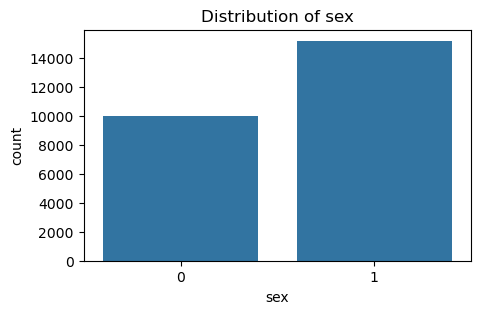

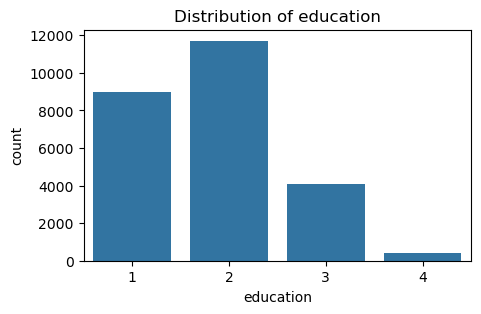

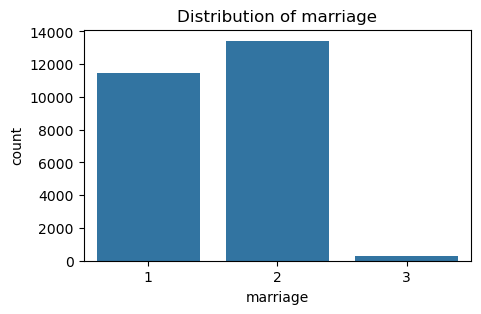

In [21]:
categorical_cols = ['sex', 'education', 'marriage']
numerical_cols = ['age', 'LIMIT_BAL', 'AVG_Bill_amt', 'PAY_TO_BILL_ratio']
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

In [22]:
 # Recalculate avg from cleaned bill_amt columns
df['avg_bill_amt'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1)

# Compare with original
diff = df['AVG_Bill_amt'] - df['avg_bill_amt']
print("Number of mismatches:", (diff != 0).sum())

# Check if any AVG_Bill_amt is negative even though bills are non-negative
df.loc[(df['AVG_Bill_amt'] < 0) & (df[[f'Bill_amt{i}' for i in range(1, 7)]].ge(0).all(axis=1))].head()


Number of mismatches: 25126


,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default,avg_bill_amt
83,84,1,0,2,380000,39.0,-2,-2,-2,-2,...,9203.06,0.00,0.20,0.08,0.00,8000.13,-8867.33,-0.32,0,512.255000
167,168,1,1,3,30000,52.0,1,-2,-2,-2,...,0.07,0.00,0.00,1519.99,0.22,0.00,-158.33,-1.60,0,253.406667
185,186,1,1,2,450000,37.0,-1,-1,-1,-1,...,1031.95,2663.16,782.86,1730.15,0.06,70803.11,-7377.33,-1.74,1,1196.648333
368,369,2,1,2,10000,23.0,1,-2,-2,-2,...,0.23,0.00,0.13,0.00,0.03,999.85,-1000.00,-0.17,1,0.000000
528,529,1,1,2,100000,44.0,1,-2,-2,-2,...,0.18,0.00,0.33,16824.83,0.00,1823.01,-2596.83,-1.20,0,1628.148333


In [23]:
df.drop(columns=['AVG_Bill_amt'], inplace=True, errors='ignore')
df.rename(columns={'pay_0': 'pay_1'}, inplace=True)

In [24]:
df['total_bill'] = df[[f'Bill_amt{i}' for i in range(1, 7)]].sum(axis=1)
df['total_pay'] = df[[f'pay_amt{i}' for i in range(1, 7)]].sum(axis=1)
df['pay_to_bill_ratio_fixed'] = df['total_pay'] / (df['total_bill'] + 1e-6)

In [25]:
df.drop(columns=['PAY_TO_BILL_ratio'], inplace=True, errors = 'ignore')

In [26]:
df.drop(columns=['avg_bill_amt_fixed', 'total_bill', 'total_pay'], inplace=True, errors = 'ignore')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25180 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customer_ID              25180 non-null  int64  
 1   marriage                 25180 non-null  int64  
 2   sex                      25180 non-null  int64  
 3   education                25180 non-null  int64  
 4   LIMIT_BAL                25180 non-null  int64  
 5   age                      25180 non-null  float64
 6   pay_1                    25180 non-null  int64  
 7   pay_2                    25180 non-null  int64  
 8   pay_3                    25180 non-null  int64  
 9   pay_4                    25180 non-null  int64  
 10  pay_5                    25180 non-null  int64  
 11  pay_6                    25180 non-null  int64  
 12  Bill_amt1                25180 non-null  float64
 13  Bill_amt2                25180 non-null  float64
 14  Bill_amt3                25

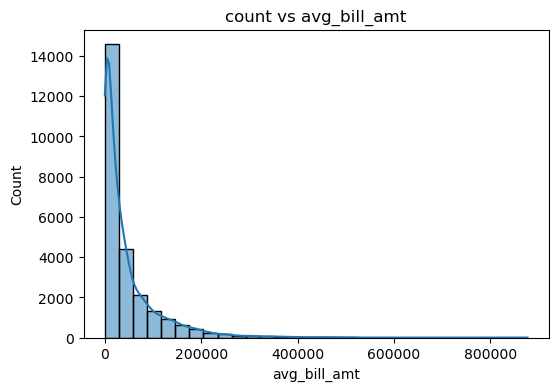

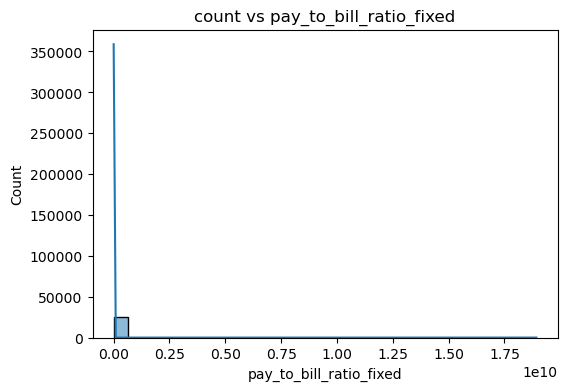

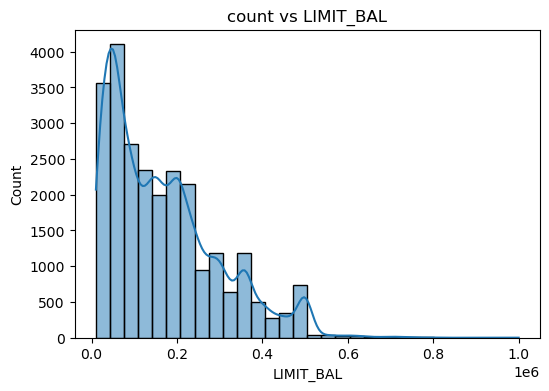

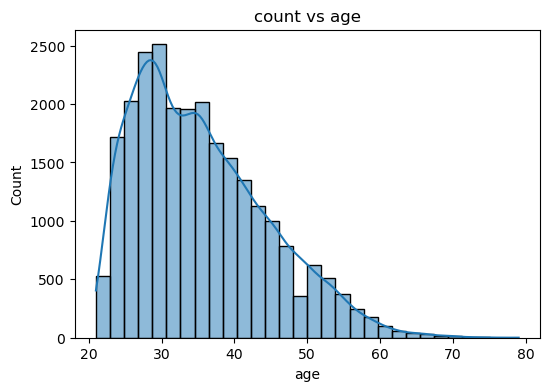

In [28]:
cols_to_plot = ['avg_bill_amt', 'pay_to_bill_ratio_fixed', 'LIMIT_BAL', 'age']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, stat='count', kde=True)
    plt.title(f'count vs {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [29]:
df.columns


Index(['Customer_ID', 'marriage', 'sex', 'education', 'LIMIT_BAL', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'Bill_amt1',
       'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'next_month_default', 'avg_bill_amt', 'pay_to_bill_ratio_fixed'],
      dtype='object')

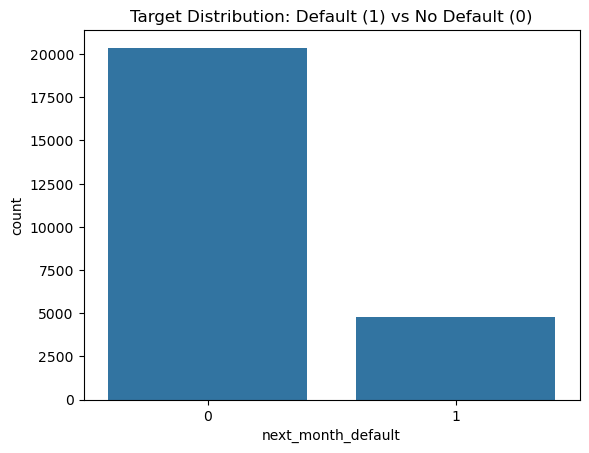

In [30]:
sns.countplot(data=df, x='next_month_default')
plt.title("Target Distribution: Default (1) vs No Default (0)")
plt.show()

### Bi-Variate Analysis

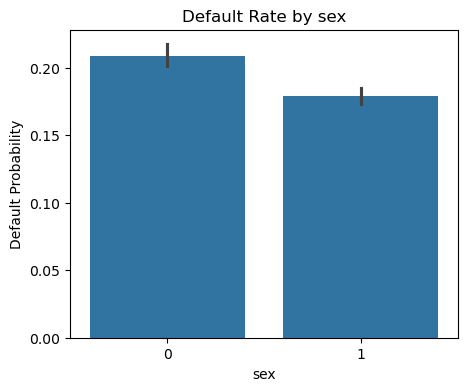

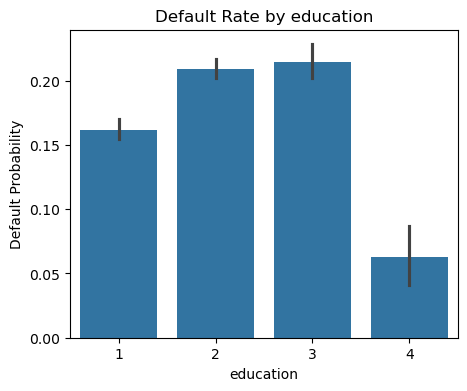

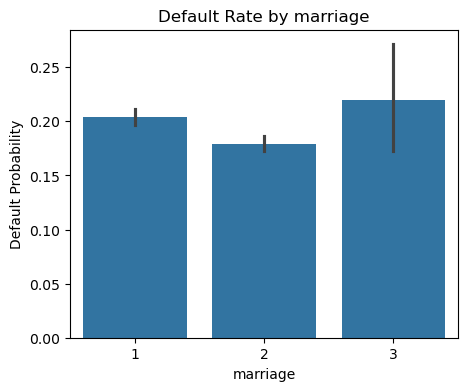

In [31]:
for col in categorical_cols:
    plt.figure(figsize=(5, 4))
    sns.barplot(data=df, x=col, y='next_month_default')
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Probability')
    plt.show()

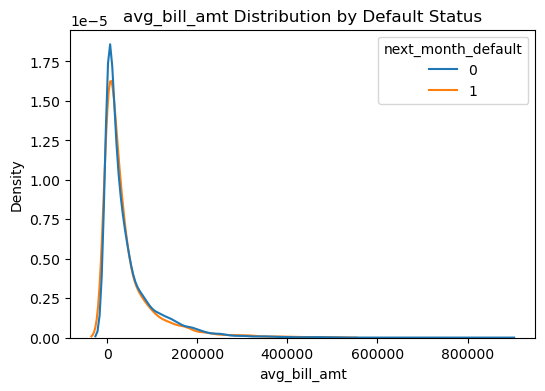

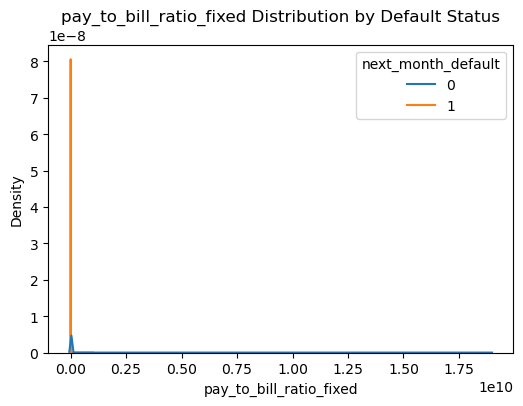

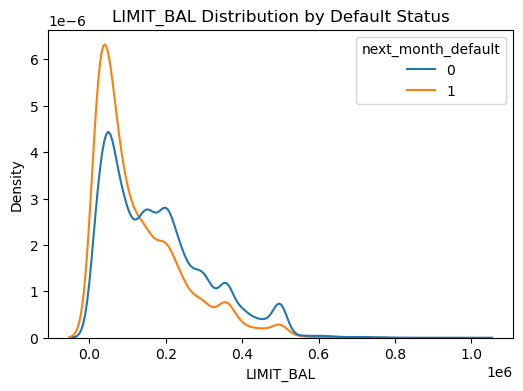

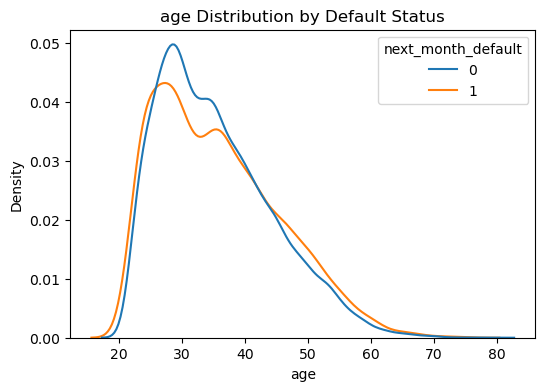

In [32]:
cols_to_plot = ['avg_bill_amt', 'pay_to_bill_ratio_fixed', 'LIMIT_BAL', 'age']

for col in cols_to_plot:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='next_month_default', common_norm=False)
    plt.title(f'{col} Distribution by Default Status')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()


Correlation of variables with target:
next_month_default         1.000000
pay_1                      0.236910
pay_2                      0.187244
pay_3                      0.169038
pay_4                      0.148773
LIMIT_BAL                 -0.146217
pay_5                      0.137135
pay_6                      0.125127
pay_amt1                  -0.068823
pay_amt4                  -0.053714
pay_amt2                  -0.053643
pay_amt3                  -0.050888
pay_amt6                  -0.047261
pay_amt5                  -0.047123
sex                       -0.037383
education                  0.034077
marriage                  -0.027706
Bill_amt1                 -0.022131
age                        0.018239
Bill_amt3                 -0.017066
Bill_amt2                 -0.016413
avg_bill_amt              -0.015059
Bill_amt4                 -0.012377
Bill_amt5                 -0.009352
Bill_amt6                 -0.006109
pay_to_bill_ratio_fixed   -0.003248
Name: next_month_default, 

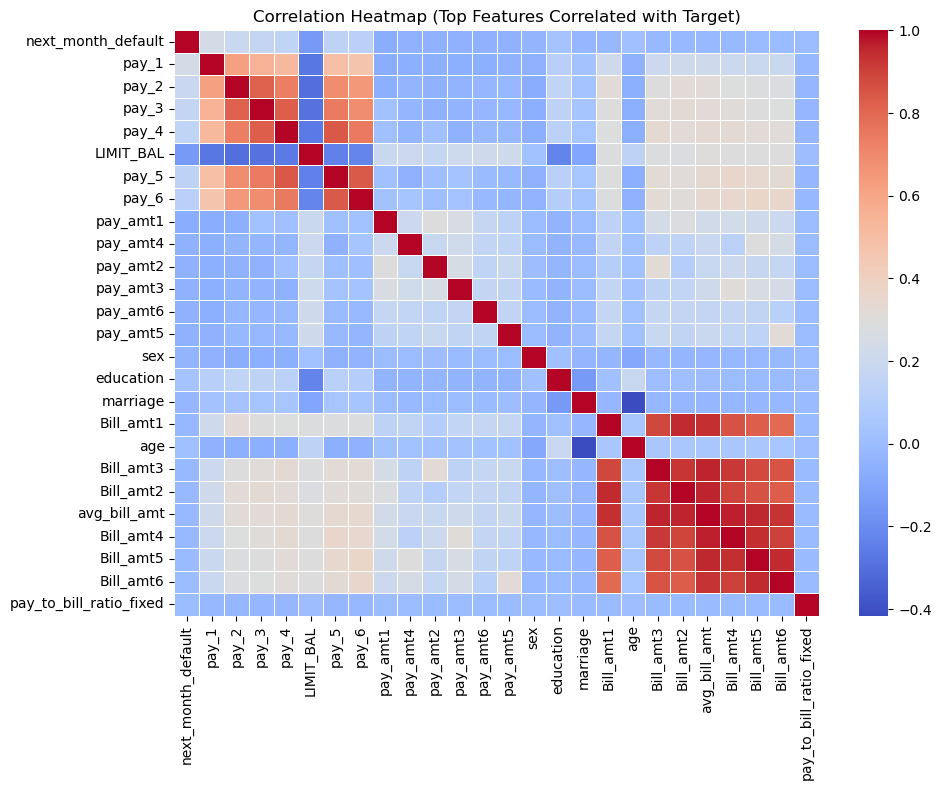

In [33]:
# Drop non-numeric or irrelevant columns if any (like Customer ID if present)
df1 = df
df1 = df1.drop(columns=['Customer_ID'], errors='ignore')

# Calculate correlation matrix
corr_matrix = df1.corr(numeric_only=True)

# Extract correlation with target variable
target_corr = corr_matrix['next_month_default'].sort_values(key=abs, ascending=False)

# Print correlation values
print("Correlation of variables with target:")
print(target_corr)

# Plot heatmap of top correlated features with target
plt.figure(figsize=(10, 8))
sns.heatmap(df1[target_corr.index].corr(), cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Top Features Correlated with Target)")
plt.tight_layout()
plt.show()


# FEATURE ENGINEERING

In [34]:
# Repayment Behaviour pattern
pay_cols = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Max delay in any month
df['max_delay'] = df[pay_cols].max(axis=1)

# Count of months with delay (pay_m >= 1)
df['n_delinquent_months'] = df[pay_cols].apply(lambda row: (row >= 1).sum(), axis=1)

# Count of on-time full payments (pay_m == -1)
df['n_ontime_full'] = df[pay_cols].apply(lambda row: (row == -1).sum(), axis=1)

# Average delay over delinquent months
def avg_delay(row):
    delays = [x for x in row if x >= 1]
    return sum(delays) / len(delays) if delays else 0

df['avg_delay'] = df[pay_cols].apply(avg_delay, axis=1)

# Longest streak of consecutive overdue months
def longest_streak(row):
    streak = 0
    max_streak = 0
    for val in row:
        if val >= 1:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

df['delinquency_streak'] = df[pay_cols].apply(longest_streak, axis=1)

In [35]:
#Repayment Consistency and Discipline

# Std deviation of payment status → inconsistency
df['pay_std'] = df[pay_cols].std(axis=1)

# Number of months with no usage (pay_m == -2)
df['n_no_usage'] = df[pay_cols].apply(lambda row: (row == -2).sum(), axis=1)

# Proportion of delinquent months
df['prop_delinquent'] = df['n_delinquent_months'] / 7

In [36]:
df = pd.get_dummies(df,                        #One-hot encoding
                            columns=['marriage', 'education'], 
                            prefix=['marriage', 'education'], 
                            drop_first=True, 
                            dtype=int) 

In [37]:
df

,Customer_ID,sex,LIMIT_BAL,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,...,avg_delay,delinquency_streak,pay_std,n_no_usage,prop_delinquent,marriage_2,marriage_3,education_2,education_3,education_4
0,1,0,60000,25.0,1,1,1,0,0,0,...,1.0,3,0.547723,0,0.428571,1,0,1,0,0
1,2,1,290000,24.0,0,0,-2,-2,-1,0,...,0.0,0,0.983192,2,0.000000,1,0,0,0,0
2,3,0,180000,63.0,0,0,0,0,0,0,...,0.0,0,0.000000,0,0.000000,0,0,1,0,0
3,4,1,210000,43.0,0,0,0,0,0,0,...,0.0,0,0.000000,0,0.000000,0,0,1,0,0
4,5,0,280000,32.0,-2,-2,-2,-2,-2,-2,...,0.0,0,0.000000,6,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,25243,1,90000,33.0,0,0,0,0,1,1,...,1.0,2,0.516398,0,0.285714,0,0,1,0,0
25243,25244,0,60000,49.0,0,0,0,0,0,0,...,0.0,0,0.000000,0,0.000000,0,0,1,0,0
25244,25245,0,120000,31.0,-1,-1,-1,-1,-1,-1,...,0.0,0,0.000000,0,0.000000,1,0,0,0,0
25245,25246,1,390000,40.0,0,0,0,0,0,0,...,0.0,0,0.000000,0,0.000000,0,0,0,0,1


In [38]:
print(df.columns)

Index(['Customer_ID', 'sex', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3',
       'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3',
       'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'next_month_default',
       'avg_bill_amt', 'pay_to_bill_ratio_fixed', 'max_delay',
       'n_delinquent_months', 'n_ontime_full', 'avg_delay',
       'delinquency_streak', 'pay_std', 'n_no_usage', 'prop_delinquent',
       'marriage_2', 'marriage_3', 'education_2', 'education_3',
       'education_4'],
      dtype='object')


In [39]:
cols_to_drop = []

# Repayment status for each month
cols_to_drop += ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Raw monthly bill amounts
cols_to_drop += [f'bill_amt{i}' for i in range(1, 7)]

# Raw monthly payment amounts
cols_to_drop += [f'pay_amt{i}' for i in range(1, 7)]


### Handling-Class Imbalance using SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Prepare feature matrix and target variable
features = df.drop(columns=['next_month_default', 'customer_id'] + cols_to_drop, errors='ignore')
target = df['next_month_default']

# Split the dataset before applying SMOTE
X_dev, X_eval, y_dev, y_eval = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

# Apply SMOTE only on training data
oversampler = SMOTE(random_state=42)
X_dev_bal, y_dev_bal = oversampler.fit_resample(X_dev, y_dev)

print("Original training target distribution:\n", target.value_counts())


Original training target distribution:
 next_month_default
0    20377
1     4803
Name: count, dtype: int64


In [41]:
print("Before SMOTE:", y_dev.value_counts())
print("After SMOTE:", y_dev_bal.value_counts())


Before SMOTE: next_month_default
0    16302
1     3842
Name: count, dtype: int64
After SMOTE: next_month_default
0    16302
1    16302
Name: count, dtype: int64


### Training ML models on Training Dataset

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier

In [43]:
from sklearn.metrics import make_scorer, fbeta_score

# F2-score scorer
f2_scorer = make_scorer(fbeta_score, beta=2)


### Hyper-Parameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV

# -------------------- Logistic Regression --------------------
logreg = LogisticRegression(solver='liblinear', random_state=42)

param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200]
}

grid_logreg = GridSearchCV(estimator=logreg, param_grid=param_grid_logreg,
                           cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)

# -------------------- Decision Tree --------------------
dt = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                       cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)

# -------------------- K-Nearest Neighbors --------------------
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn,
                        cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)

# -------------------- Random Forest --------------------
rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                       cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)

# -------------------- XGBoost --------------------
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb,
                        cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)

# -------------------- LightGBM --------------------
lgb = LGBMClassifier(random_state=42)

param_grid_lgb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0]
}

grid_lgb = GridSearchCV(estimator=lgb, param_grid=param_grid_lgb,
                        cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)

# -------------------- AdaBoost --------------------
ab = AdaBoostClassifier(random_state=42)

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_ab = GridSearchCV(estimator=ab, param_grid=param_grid_ab,
                       cv=5, scoring=f2_scorer, n_jobs=-1, verbose=2)


# -------------------- Now Run the GridSearch --------------------

# Random Forest
print("Tuning Random Forest...")
grid_rf.fit(X_dev_bal, y_dev_bal)
print("Best RF params:", grid_rf.best_params_)

# XGBoost
print("\nTuning XGBoost...")
grid_xgb.fit(X_dev_bal, y_dev_bal)
print("Best XGB params:", grid_xgb.best_params_)

# LightGBM
print("\nTuning LightGBM...")
grid_lgb.fit(X_dev_bal, y_dev_bal)
print("Best LGB params:", grid_lgb.best_params_)

# Logistic Regression
print("\nTuning Logistic Regression...")
grid_logreg.fit(X_dev_bal, y_dev_bal)
print("Best Logistic Regression params:", grid_logreg.best_params_)

# Decision Tree
print("\nTuning Decision Tree...")
grid_dt.fit(X_dev_bal, y_dev_bal)
print("Best Decision Tree params:", grid_dt.best_params_)

# KNN
print("\nTuning KNN...")
grid_knn.fit(X_dev_bal, y_dev_bal)
print("Best KNN params:", grid_knn.best_params_)

# Adaboost
print("\nTuning AdaBoost...")
grid_ab.fit(X_dev_bal, y_dev_bal)
print("Best AdaBoost params:", grid_ab.best_params_)

Tuning Random Forest...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best RF params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuning XGBoost...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGB params: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Tuning LightGBM...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Info] Number of positive: 16302, number of negative: 16302
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3600
[LightGBM] [Info] Number of data points in the train set: 32604, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best

In [45]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, classification_report,
    roc_auc_score, fbeta_score, accuracy_score
)
import matplotlib.pyplot as plt

def train_and_evaluate(model, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name=""):
    # Predict on training and test (evaluation) data
    y_pred_train = model.predict(X_dev_bal)
    y_pred = model.predict(X_eval)

    # Probabilities
    y_proba = model.predict_proba(X_eval)[:, 1] if hasattr(model, 'predict_proba') else None

    print(f"\n--- {model_name} ---")
    print(f"Train Accuracy: {accuracy_score(y_dev_bal, y_pred_train):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_eval, y_pred):.4f}")

    print("Confusion Matrix:\n", confusion_matrix(y_eval, y_pred))
    print("Classification Report:\n", classification_report(y_eval, y_pred))

    if y_proba is not None:
        print("ROC-AUC Score:", roc_auc_score(y_eval, y_proba))

    print("F2 Score:", fbeta_score(y_eval, y_pred, beta=2))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_eval, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, 'classes_') else None)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


--- RandomForest ---
Train Accuracy: 1.0000
Test Accuracy: 0.8284
Confusion Matrix:
 [[3839  236]
 [ 628  333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4075
           1       0.59      0.35      0.44       961

    accuracy                           0.83      5036
   macro avg       0.72      0.64      0.67      5036
weighted avg       0.81      0.83      0.81      5036

ROC-AUC Score: 0.7726038188747661
F2 Score: 0.3772943575798776


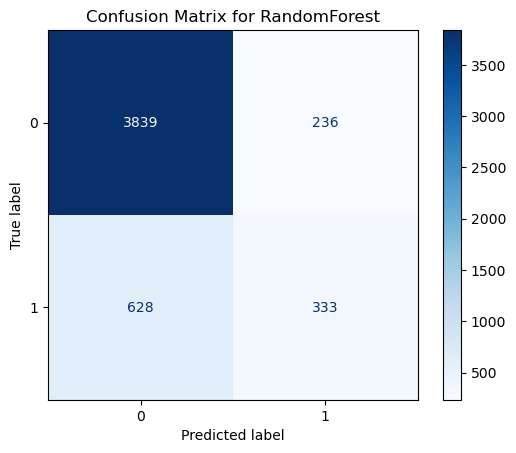

In [46]:
train_and_evaluate(grid_rf.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='RandomForest')

In [47]:
from sklearn.metrics import fbeta_score, accuracy_score
import numpy as np

# Predicted probabilities for class 1 using Random Forest
y_proba_rf = grid_rf.best_estimator_.predict_proba(X_eval)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_rf >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = thresh

# Predict using best threshold
y_pred_best_thresh_rf = (y_proba_rf >= best_threshold).astype(int)

# Accuracy at best threshold
accuracy_rf = accuracy_score(y_eval, y_pred_best_thresh_rf)

print(f"Best F2 Score (Random Forest): {best_f2:.4f} at Threshold = {best_threshold:.2f}")
print(f"Accuracy at Best Threshold: {accuracy_rf:.4f}")


Best F2 Score (Random Forest): 0.6022 at Threshold = 0.20
Accuracy at Best Threshold: 0.6338



--- LightGBM ---
Train Accuracy: 0.9988
Test Accuracy: 0.8195
Confusion Matrix:
 [[3829  246]
 [ 663  298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4075
           1       0.55      0.31      0.40       961

    accuracy                           0.82      5036
   macro avg       0.70      0.62      0.64      5036
weighted avg       0.79      0.82      0.80      5036

ROC-AUC Score: 0.7458789732065909
F2 Score: 0.33956244302643573


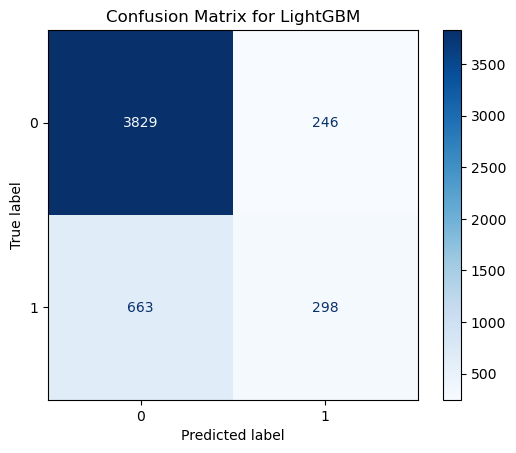

In [48]:
train_and_evaluate(grid_lgb.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='LightGBM')

In [49]:
from sklearn.metrics import fbeta_score, accuracy_score, precision_recall_curve
import numpy as np

# Predicted probabilities for class 1 using LightGBM
y_proba_lgb = grid_lgb.best_estimator_.predict_proba(X_eval)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_lgb >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = thresh

# Predict using the best threshold
y_pred_best_thresh_lgb = (y_proba_lgb >= best_threshold).astype(int)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_eval, y_pred_best_thresh_lgb)

print(f"LightGBM Best F2 Score: {best_f2:.4f} at Threshold = {best_threshold:.2f}")
print(f"Accuracy at Best Threshold: {accuracy_lgb:.4f}")

LightGBM Best F2 Score: 0.5663 at Threshold = 0.11
Accuracy at Best Threshold: 0.6924



--- XGBoost ---
Train Accuracy: 0.9767
Test Accuracy: 0.8235
Confusion Matrix:
 [[3818  257]
 [ 632  329]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4075
           1       0.56      0.34      0.43       961

    accuracy                           0.82      5036
   macro avg       0.71      0.64      0.66      5036
weighted avg       0.80      0.82      0.81      5036

ROC-AUC Score: 0.7473291497226178
F2 Score: 0.37133182844243795


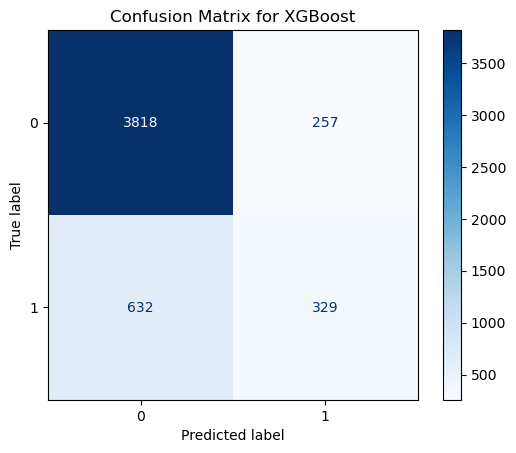

In [50]:
train_and_evaluate(grid_xgb.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='XGBoost')

In [51]:
from sklearn.metrics import fbeta_score, accuracy_score

# Predicted probabilities for class 1 using XGBoost
y_proba_xgb = grid_xgb.best_estimator_.predict_proba(X_eval)[:, 1]

best_f2_xgb = 0
best_threshold_xgb = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_xgb >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)
    if f2 > best_f2_xgb:
        best_f2_xgb = f2
        best_threshold_xgb = thresh

# Generate predictions using the best threshold
y_pred_best_thresh_xgb = (y_proba_xgb >= best_threshold_xgb).astype(int)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_eval, y_pred_best_thresh_xgb)

print(f"Best F2 Score (XGBoost): {best_f2_xgb:.4f} at Threshold = {best_threshold_xgb:.2f}")
print(f"Accuracy at Best Threshold: {accuracy_xgb:.4f}")


Best F2 Score (XGBoost): 0.5750 at Threshold = 0.10
Accuracy at Best Threshold: 0.6072



--- LogisticRegression ---
Train Accuracy: 0.8107
Test Accuracy: 0.8092
Confusion Matrix:
 [[3673  402]
 [ 559  402]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      4075
           1       0.50      0.42      0.46       961

    accuracy                           0.81      5036
   macro avg       0.68      0.66      0.67      5036
weighted avg       0.80      0.81      0.80      5036

ROC-AUC Score: 0.7224468377137823
F2 Score: 0.43244406196213425


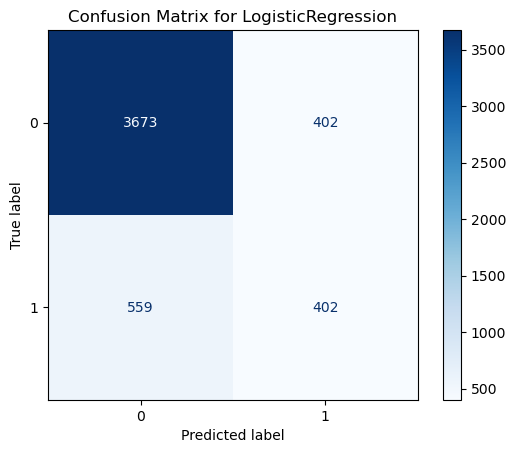

In [52]:
train_and_evaluate(grid_logreg.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='LogisticRegression')

In [53]:
# Predicted probabilities for class 1 using LogisticRegression
y_proba_logreg = grid_logreg.best_estimator_.predict_proba(X_eval)[:, 1]

best_f2_logreg = 0
best_threshold_logreg = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_logreg >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)
    if f2 > best_f2_logreg:
        best_f2_logreg = f2
        best_threshold_logreg = thresh

print(f"Best F2 Score (Logistic Regression): {best_f2_logreg:.4f} at Threshold = {best_threshold_logreg:.2f}")

Best F2 Score (Logistic Regression): 0.5593 at Threshold = 0.19



--- KNN ---
Train Accuracy: 1.0000
Test Accuracy: 0.6287
Confusion Matrix:
 [[2735 1340]
 [ 530  431]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75      4075
           1       0.24      0.45      0.32       961

    accuracy                           0.63      5036
   macro avg       0.54      0.56      0.53      5036
weighted avg       0.72      0.63      0.66      5036

ROC-AUC Score: 0.5739476388986421
F2 Score: 0.383793410507569


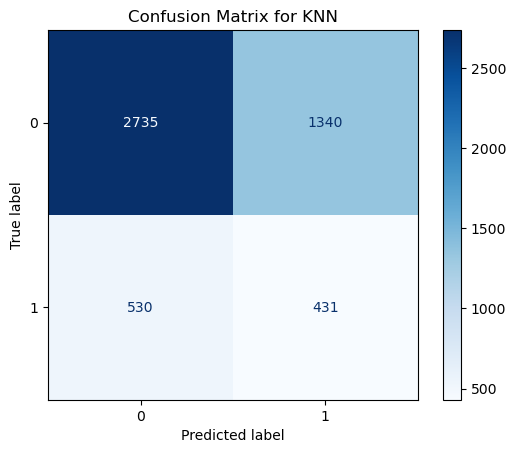

In [54]:
train_and_evaluate(grid_knn.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='KNN')

In [55]:
from sklearn.metrics import fbeta_score, accuracy_score

# Predicted probabilities for class 1 using KNN
y_proba_knn = grid_knn.best_estimator_.predict_proba(X_eval)[:, 1]

best_f2_knn = 0
best_threshold_knn = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_knn >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)
    if f2 > best_f2_knn:
        best_f2_knn = f2
        best_threshold_knn = thresh

# Use best threshold to generate final predictions
y_pred_best_thresh_knn = (y_proba_knn >= best_threshold_knn).astype(int)

# Calculate accuracy at best threshold
accuracy_knn = accuracy_score(y_eval, y_pred_best_thresh_knn)

print(f"Best F2 Score (KNN): {best_f2_knn:.4f} at Threshold = {best_threshold_knn:.2f}")
print(f"Accuracy at Best Threshold: {accuracy_knn:.4f}")


Best F2 Score (KNN): 0.4718 at Threshold = 0.11
Accuracy at Best Threshold: 0.4867



--- DecisionTree ---
Train Accuracy: 0.9998
Test Accuracy: 0.7268
Confusion Matrix:
 [[3286  789]
 [ 587  374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      4075
           1       0.32      0.39      0.35       961

    accuracy                           0.73      5036
   macro avg       0.59      0.60      0.59      5036
weighted avg       0.75      0.73      0.74      5036

ROC-AUC Score: 0.5977042063801128
F2 Score: 0.37347713201517874


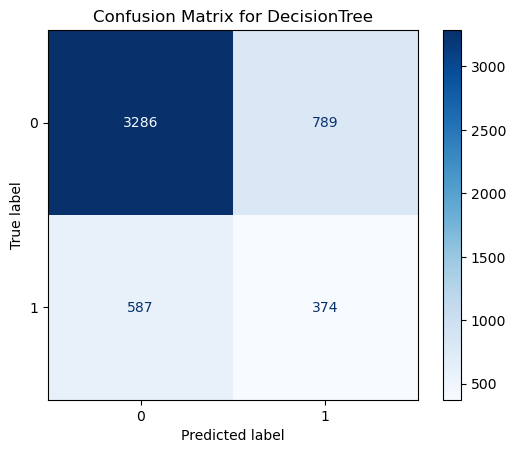

In [56]:
train_and_evaluate(grid_dt.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='DecisionTree')

In [57]:
from sklearn.metrics import fbeta_score, accuracy_score

# Predicted probabilities for class 1 using DecisionTree
y_proba_dt = grid_dt.best_estimator_.predict_proba(X_eval)[:, 1]

best_f2_dt = 0
best_threshold_dt = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_dt >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)
    if f2 > best_f2_dt:
        best_f2_dt = f2
        best_threshold_dt = thresh

# Use best threshold to generate final predictions
y_pred_best_thresh = (y_proba_dt >= best_threshold_dt).astype(int)

# Calculate accuracy
accuracy_dt = accuracy_score(y_eval, y_pred_best_thresh)

print(f"Best F2 Score (Decision Tree): {best_f2_dt:.4f} at Threshold = {best_threshold_dt:.2f}")
print(f"Accuracy at Best Threshold: {accuracy_dt:.4f}")


Best F2 Score (Decision Tree): 0.3735 at Threshold = 0.51
Accuracy at Best Threshold: 0.7268



--- AdaBoost ---
Train Accuracy: 0.7788
Test Accuracy: 0.7387
Confusion Matrix:
 [[3085  990]
 [ 326  635]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      4075
           1       0.39      0.66      0.49       961

    accuracy                           0.74      5036
   macro avg       0.65      0.71      0.66      5036
weighted avg       0.81      0.74      0.76      5036

ROC-AUC Score: 0.708912622970704
F2 Score: 0.5805448893764856


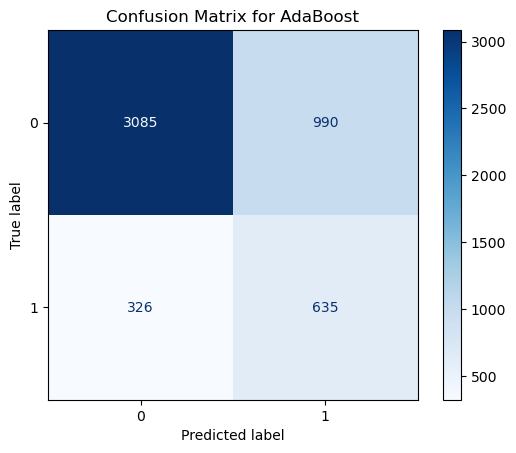

In [58]:
train_and_evaluate(grid_ab.best_estimator_, X_dev_bal, y_dev_bal, X_eval, y_eval, model_name='AdaBoost')

In [59]:
from sklearn.metrics import fbeta_score, accuracy_score
import numpy as np

# Predicted probabilities for class 1 using AdaBoost
y_proba_ab = grid_ab.best_estimator_.predict_proba(X_eval)[:, 1]

# Define thresholds to test
thresholds = np.arange(0.1, 0.9, 0.01)

best_f2 = 0
best_threshold = 0.5

for thresh in thresholds:
    y_pred_thresh = (y_proba_ab >= thresh).astype(int)
    f2 = fbeta_score(y_eval, y_pred_thresh, beta=2)

    if f2 > best_f2:
        best_f2 = f2
        best_threshold = thresh

# Final prediction using best threshold
y_pred_best_thresh_ab = (y_proba_ab >= best_threshold).astype(int)

# Calculate accuracy at best threshold
accuracy_ab = accuracy_score(y_eval, y_pred_best_thresh_ab)

print(f"AdaBoost Best F2 Score: {best_f2:.4f} at Threshold = {best_threshold:.2f}")
print(f"Accuracy at Best Threshold: {accuracy_ab:.4f}")


AdaBoost Best F2 Score: 0.5805 at Threshold = 0.12
Accuracy at Best Threshold: 0.7387


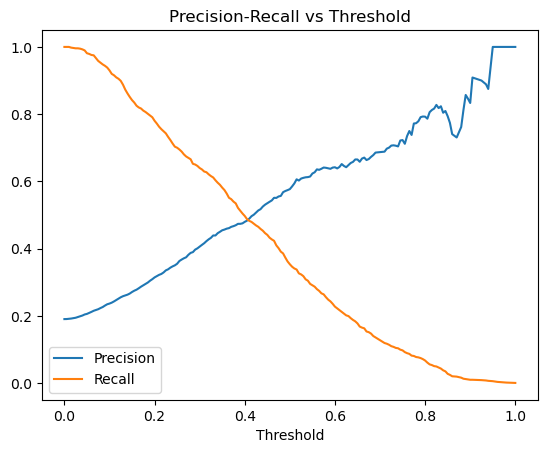

In [60]:
from sklearn.metrics import precision_recall_curve


y_proba = grid_rf.best_estimator_.predict_proba(X_eval)[:,1]
precision, recall, thresholds = precision_recall_curve(y_eval, y_proba)

# Plot precision-recall curve to find the best threshold using Random-Forest
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

In [61]:
# Optimal Threshold
optimal_threshold = 0.57  

y_pred_opt = (y_proba >= optimal_threshold).astype(int)

print("Confusion Matrix at (Tuned Threshold):\n", confusion_matrix(y_eval, y_pred_opt))
print("Classification Report (Tuned Threshold):\n", classification_report(y_eval, y_pred_opt))
print("F2 Score (Tuned Threshold):", fbeta_score(y_eval, y_pred_opt, beta =2))

Confusion Matrix at (Tuned Threshold):
 [[3929  146]
 [ 704  257]]
Classification Report (Tuned Threshold):
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      4075
           1       0.64      0.27      0.38       961

    accuracy                           0.83      5036
   macro avg       0.74      0.62      0.64      5036
weighted avg       0.81      0.83      0.80      5036

F2 Score (Tuned Threshold): 0.3025665175417942


### Data-Processing and Cleaning of Validate_Dataset

In [62]:
validate_df = pd.read_csv("validate_dataset_final.csv")

In [63]:
validate_df.describe()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,...,5016.000000,5016.000000,5016.000000,5.016000e+03,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,2508.500000,1.554027,0.606659,1.840909,168977.272727,35.379785,-0.031300,-0.161683,-0.188198,-0.235048,...,41244.782709,39805.868369,5356.196780,6.321958e+03,5420.142849,5150.979306,4926.404159,5148.384402,46054.169703,0.417159
std,1448.138806,0.517560,0.488540,0.794177,129478.787500,9.206542,1.116011,1.178731,1.172155,1.129667,...,62255.394325,60698.632561,13660.489329,2.920905e+04,17011.204561,17376.949234,17085.022267,16879.411346,65214.851897,13.729586
min,1.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-10897.000000,-546.930000
25%,1254.750000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1755.395000,1205.210000,1000.047500,9.899050e+02,403.265000,278.172500,299.310000,156.382500,4905.665000,0.040000
50%,2508.500000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,17953.255000,17054.315000,2093.655000,2.000410e+03,1845.425000,1500.120000,1500.155000,1453.210000,20933.415000,0.090000
75%,3762.250000,2.000000,1.000000,2.000000,240000.000000,41.250000,0.000000,0.000000,0.000000,0.000000,...,50175.052500,49070.565000,5029.505000,5.000323e+03,4883.887500,4282.550000,4097.725000,4000.095000,56573.540000,0.570000
max,5016.000000,3.000000,1.000000,6.000000,800000.000000,75.000000,8.000000,7.000000,7.000000,7.000000,...,547880.830000,513798.830000,323014.110000,1.684259e+06,371717.910000,432129.910000,426529.180000,260000.100000,548854.330000,797.000000


In [64]:
validate_df.info()
validate_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5016 non-null   int64  
 1   marriage           5016 non-null   int64  
 2   sex                5016 non-null   int64  
 3   education          5016 non-null   int64  
 4   LIMIT_BAL          5016 non-null   int64  
 5   age                5016 non-null   int64  
 6   pay_0              5016 non-null   int64  
 7   pay_2              5016 non-null   int64  
 8   pay_3              5016 non-null   int64  
 9   pay_4              5016 non-null   int64  
 10  pay_5              5016 non-null   int64  
 11  pay_6              5016 non-null   int64  
 12  Bill_amt1          5016 non-null   float64
 13  Bill_amt2          5016 non-null   float64
 14  Bill_amt3          5016 non-null   float64
 15  Bill_amt4          5016 non-null   float64
 16  Bill_amt5          5016 

(5016, 26)

In [65]:
for col in ['marriage', 'sex', 'education']:
  print(validate_df[col].value_counts())

marriage
2    2702
1    2262
3      43
0       9
Name: count, dtype: int64
sex
1    3043
0    1973
Name: count, dtype: int64
education
2    2374
1    1796
3     760
5      54
4      20
6      10
0       2
Name: count, dtype: int64


In [66]:
validate_df['marriage'] = validate_df['marriage'].replace(0, 3)
validate_df['education'] = validate_df['education'].replace(0, 4)
validate_df['education'] = validate_df['education'].replace(5, 4)
validate_df['education'] = validate_df['education'].replace(6, 4)

In [67]:
print(validate_df['marriage'].value_counts())
print(validate_df['education'].value_counts())

marriage
2    2702
1    2262
3      52
Name: count, dtype: int64
education
2    2374
1    1796
3     760
4      86
Name: count, dtype: int64


In [68]:
validate_df.drop(columns=['AVG_Bill_amt'], inplace=True, errors='ignore')
validate_df.rename(columns={'pay_0': 'pay_1'}, inplace=True)
validate_df.drop(columns=['PAY_TO_BILL_ratio'], inplace=True, errors = 'ignore')

In [69]:
import itertools  # for delinquency_streak
# Average bill amount across 6 months
validate_df['avg_bill_amt'] = validate_df[[f'Bill_amt{i}' for i in range(1, 7)]].mean(axis=1)

# Ratio of PAY to BILL for 1st month (avoid divide by zero)
validate_df['pay_to_bill_ratio_fixed'] = (validate_df['pay_amt1'] + 1) / (validate_df['Bill_amt1'] + 1)

# Other Engineered features — approximate from common preprocessing
validate_df['max_delay'] = validate_df[[f'pay_{i}' for i in range(1, 7)]].max(axis=1)
validate_df['n_delinquent_months'] = validate_df[[f'pay_{i}' for i in range(1, 7)]].apply(lambda row: sum(row > 0), axis=1)
validate_df['n_ontime_full'] = validate_df[[f'pay_{i}' for i in range(1, 7)]].apply(lambda row: sum(row == -1), axis=1)
validate_df['avg_delay'] = validate_df[[f'pay_{i}' for i in range(1, 7)]].mean(axis=1)
validate_df['delinquency_streak'] = validate_df[[f'pay_{i}' for i in range(1, 7)]].apply(lambda row: max((sum(1 for _ in g) for k, g in itertools.groupby(row > 0) if k), default=0), axis=1)
validate_df['pay_std'] = validate_df[[f'pay_amt{i}' for i in range(1, 7)]].std(axis=1)
validate_df['n_no_usage'] = validate_df[[f'Bill_amt{i}' for i in range(1, 7)]].apply(lambda row: sum(row == 0), axis=1)
validate_df['prop_delinquent'] = validate_df['n_delinquent_months'] / 6

In [70]:
validate_df = pd.get_dummies(validate_df,                        #One-hot encoding
                            columns=['marriage', 'education'], 
                            prefix=['marriage', 'education'], 
                            drop_first=True, 
                            dtype=int)

In [71]:
validate_df.columns

Index(['Customer_ID', 'sex', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3',
       'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3',
       'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'avg_bill_amt',
       'pay_to_bill_ratio_fixed', 'max_delay', 'n_delinquent_months',
       'n_ontime_full', 'avg_delay', 'delinquency_streak', 'pay_std',
       'n_no_usage', 'prop_delinquent', 'marriage_2', 'marriage_3',
       'education_2', 'education_3', 'education_4'],
      dtype='object')

In [74]:
df.columns

Index(['Customer_ID', 'sex', 'LIMIT_BAL', 'age', 'pay_1', 'pay_2', 'pay_3',
       'pay_4', 'pay_5', 'pay_6', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3',
       'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'next_month_default',
       'avg_bill_amt', 'pay_to_bill_ratio_fixed', 'max_delay',
       'n_delinquent_months', 'n_ontime_full', 'avg_delay',
       'delinquency_streak', 'pay_std', 'n_no_usage', 'prop_delinquent',
       'marriage_2', 'marriage_3', 'education_2', 'education_3',
       'education_4'],
      dtype='object')

### Testing Random-Forest on Validate_Dataset 

In [76]:
import pandas as pd
import numpy as np
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import StandardScaler
import joblib  

#  Separate features and labels in training data
X_train = df.drop(columns=['next_month_default'])
y_train = df['next_month_default']

# Apply the same preprocessing (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_dev_bal)  # this is how you trained your model

# Prepare validation data with same feature order as training
X_validate = validate_df[X_dev_bal.columns]  # ensures same  features
X_validate_scaled = scaler.transform(X_validate)

#  Load best Random Forest model
model = grid_rf.best_estimator_  # from GridSearchCV (already trained)

#  Predict probabilities
y_proba = model.predict_proba(X_validate_scaled)[:, 1]

#  Choose optimal threshold (based on F2 tuning during training on RandomForest)
optimal_threshold = 0.57
y_pred = (y_proba >= optimal_threshold).astype(int)

#  Save prediction CSV
validate_df["next_month_default"] = y_pred
validate_df[["next_month_default"]].to_csv("submission_22112020.csv", index=False)

print(" Prediction CSV generated with optimized threshold:", optimal_threshold)

 Prediction CSV generated with optimized threshold: 0.57


### Youden’s J index to auto-select Threshold

In [80]:
from sklearn.metrics import confusion_matrix, roc_curve
import numpy as np

# 1. Predict probabilities on validation set
y_proba_val = grid_rf.best_estimator_.predict_proba(X_train_scaled)[:, 1]
y_true_val = y_dev_bal

# 2. Compute ROC curve to get TPR, FPR, thresholds
fpr, tpr, thresholds = roc_curve(y_true_val, y_proba_val)

# 3. Calculate Youden's J statistic for each threshold
youden_j = tpr - fpr
best_index = np.argmax(youden_j)
best_threshold = thresholds[best_index]

print(f" Best Threshold by Youden’s J: {best_threshold:.2f}")
print(f" Sensitivity (TPR): {tpr[best_index]:.4f}")
print(f" Specificity (1 - FPR): {1 - fpr[best_index]:.4f}")

 Best Threshold by Youden’s J: 0.57
 Sensitivity (TPR): 0.6276
 Specificity (1 - FPR): 0.7767


In [77]:
from sklearn.metrics import fbeta_score
import numpy as np

# Predict probabilities on evaluation data
y_proba_rf = grid_rf.best_estimator_.predict_proba(X_train_scaled)[:, 1]  # Probabilities for class 1
y_true_eval = y_dev_bal  # Make sure this is your true label array

# Use manually chosen threshold (optimized earlier)
optimized_threshold = 0.57

# Generate predictions using this threshold
y_pred_thresh = (y_proba_rf >= optimized_threshold).astype(int)

# Compute F2 score
f2_score = fbeta_score(y_true_eval, y_pred_thresh, beta=2)

print(f"F2 Score (Random Forest) at Threshold = {optimized_threshold:.2f}: {f2_score:.4f}")

F2 Score (Random Forest) at Threshold = 0.57: 0.6544


In [78]:
final_df = pd.read_csv("submission_22112020.csv")

### Prediction of submission_22112020.csv

In [79]:
# Value counts with percentages
counts = final_df['next_month_default'].value_counts()
percentages = final_df['next_month_default'].value_counts(normalize=True) * 100

# Combine both into a single DataFrame
summary = pd.DataFrame({
    'Count': counts,
    'Percentage (%)': percentages.round(2)
})

print(summary)

                    Count  Percentage (%)
next_month_default                       
0                    4479           89.29
1                     537           10.71
